In [1]:
from tensorflow.keras.models import model_from_json

from matplotlib import pyplot as plt
import numpy as np
import time
import cv2

/home/buikhoi/miniconda3/envs/ComputerVision/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/buikhoi/miniconda3/envs/ComputerVision/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/buikhoi/miniconda3/envs/ComputerVision/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 

In [2]:
def millis():
    return int(time.time() * 1000)

In [3]:
MODEL_NAME = 'unet_course_1312'
MODEL_FILE = './checkpoints/' + MODEL_NAME + '.json'
MODEL_WEGHT = './checkpoints/' + MODEL_NAME + '.h5'

In [4]:
with open(MODEL_FILE, 'r') as model_file:
    test_model = model_from_json(model_file.read())
test_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 32) 4640        conv2d[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 128, 128, 32) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [5]:
test_model.load_weights(MODEL_WEGHT)

In [6]:
test_folder = '/media/buikhoi/TrainingDat/course_segmentation/val/'
test_imgs = [test_folder + f for f in os.listdir(test_folder)]

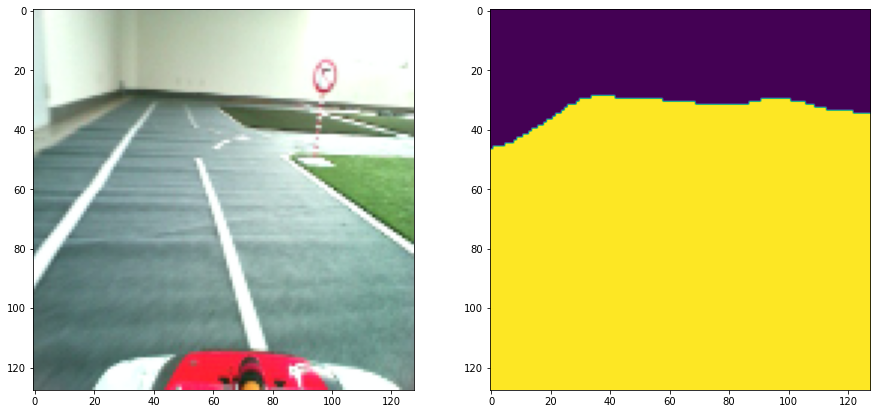

In [20]:
image = np.load(np.random.choice(test_imgs))['img'].astype('float32')
image = cv2.resize(image, (128, 128))
pred = test_model.predict(np.expand_dims(image, 0))[0]
pred[pred<0.5] = 0
pred[pred>0.5] = 1
pred = pred.astype('int')
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(pred)

In [43]:
image.dtype

dtype('float32')

In [45]:
pred.dtype

dtype('float32')